In [2]:
import pandas as pd
import numpy as np
import difflib
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import statistics 

In [3]:
movies = pd.read_csv(r"/movies.csv")
ratings = pd.read_csv(r"/ratings.csv")

In [4]:
ratings2 = ratings.reset_index()
movies2 = movies.reset_index()
movies2.head()

,index,movieId,title,genres
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2,Jumanji (1995),Adventure|Children|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,4,5,Father of the Bride Part II (1995),Comedy


In [5]:
final_dataset = ratings2.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


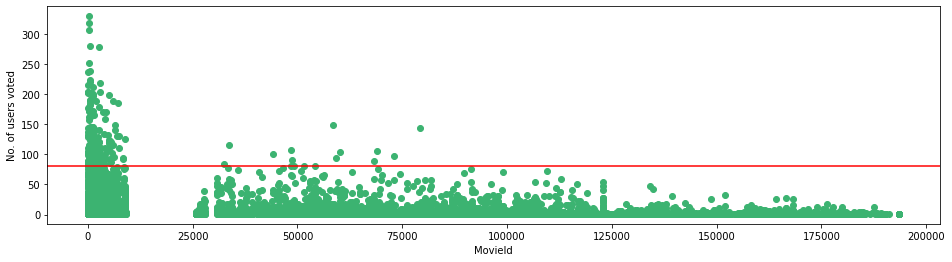

In [7]:
no_user_voted = ratings2.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings2.groupby('userId')['rating'].agg('count')

f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=80,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [8]:
# final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 80].index,:]
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]
# print(movies2.shape)
# movies2 = movies2.loc[no_user_voted[no_user_voted > 80].index,:]
# print(movies2.shape)

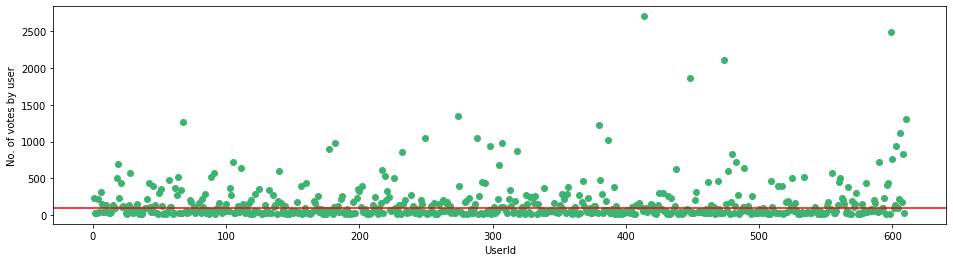

In [9]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=100,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [10]:
# final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 100].index]
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
# sparsity = 1.0 - (np.count_nonzero(sample))
csr_sample = csr_matrix(sample)
print(sample)
print(csr_sample)

[[0 0 3 0 0]
 [4 0 0 0 2]
 [0 0 0 0 1]]
  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [12]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)
print(csr_data)

  (0, 0)	4.0
  (0, 3)	4.5
  (0, 6)	2.5
  (0, 8)	4.5
  (0, 9)	3.5
  (0, 10)	4.0
  (0, 12)	3.5
  (0, 16)	3.0
  (0, 19)	3.0
  (0, 20)	3.0
  (0, 25)	5.0
  (0, 28)	5.0
  (0, 29)	4.0
  (0, 31)	3.0
  (0, 34)	5.0
  (0, 38)	5.0
  (0, 39)	4.0
  (0, 40)	4.0
  (0, 41)	2.5
  (0, 43)	4.5
  (0, 46)	0.5
  (0, 47)	4.0
  (0, 50)	2.5
  (0, 53)	4.0
  (0, 55)	3.0
  :	:
  (2118, 205)	4.0
  (2118, 345)	1.5
  (2118, 357)	4.0
  (2118, 369)	4.5
  (2119, 37)	3.5
  (2119, 62)	3.0
  (2119, 98)	0.5
  (2119, 127)	4.5
  (2119, 156)	4.5
  (2119, 236)	0.5
  (2119, 256)	4.5
  (2119, 317)	2.0
  (2119, 345)	2.0
  (2119, 357)	5.0
  (2119, 365)	3.5
  (2120, 37)	4.0
  (2120, 62)	5.0
  (2120, 146)	2.5
  (2120, 155)	4.5
  (2120, 156)	5.0
  (2120, 186)	5.0
  (2120, 205)	4.0
  (2120, 236)	3.0
  (2120, 317)	3.5
  (2120, 357)	4.0


In [13]:

knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [14]:
def get_movie_recommendation(movie_name):
    n_movies_to_recommend = 10
    list_of_all_titles = movies2['title'].tolist()
    listdiff = difflib.get_close_matches(movie_name, list_of_all_titles,5)
    listcontain = movies2[movies2['title'].str.contains(movie_name,case = False)]
    lis = listcontain["title"].tolist()
    lis.extend(listdiff)
    actual_list = list(set(lis))
    movie_list = []
    for i in actual_list:
        movie_idx = int(movies2[movies2["title"] == i]['movieId'])
        if(final_dataset['movieId'] == movie_idx).any():
            movie_list.append(i)
    for index, value in enumerate(movie_list):
        print(index+1, value)
    if len(movie_list):
        whichmovie = int(input("Which Movie Name Did you mean, Enter the index "))
        if whichmovie > len(movie_list):
            print("sorry wrong index,Please Enter the correct index")
            whichmovie = int(input())
        movie_idx = int(movies2[movies2["title"] == movie_list[whichmovie-1]]['movieId'])
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_recommend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        var = []

        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies2[movies2['movieId'] == movie_idx].index[0]
            var.append(val[1])
            recommend_frame.append({'Title':movies2.iloc[idx]['title'],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_recommend+1))
        res = statistics.variance(var)
        print("The variance of list is : " + str(res))
        return df
    
    else:
        return "No movies found. Please check your input"

In [15]:
get_movie_recommendation('King long')

1 King Kong (2005)
2 King Kong (1976)
3 King Kong (1933)
Which Movie Name Did you mean, Enter the index 3
The variance of list is : 0.000843302810617347


,Title,Distance
1,Dr. No (1962),0.620460
2,From Russia with Love (1963),0.619014
3,King Kong (1976),0.618052
4,Jaws (1975),0.612727
5,Little Shop of Horrors (1986),0.612136
6,Bedknobs and Broomsticks (1971),0.607436
7,Goldfinger (1964),0.599155
8,"Poseidon Adventure, The (1972)",0.561171
9,Live and Let Die (1973),0.559313
10,Planet of the Apes (1968),0.543652


In [16]:
get_movie_recommendation('pulp')

1 Pulp Fiction (1994)
Which Movie Name Did you mean, Enter the index 1
The variance of list is : 0.0009132069541078931


,Title,Distance
1,Goodfellas (1990),0.329255
2,American Beauty (1999),0.328066
3,"Matrix, The (1999)",0.319978
4,Fargo (1996),0.310647
5,Fight Club (1999),0.295286
6,"Usual Suspects, The (1995)",0.278261
7,Forrest Gump (1994),0.275716
8,Seven (a.k.a. Se7en) (1995),0.273683
9,"Shawshank Redemption, The (1994)",0.249804
10,"Silence of the Lambs, The (1991)",0.249232


In [17]:
# import difflib
movie_name = input(' Enter your favourite movie name : ')
list_of_all_titles = movies['title'].tolist()
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

 Enter your favourite movie name : Iron
[]


In [18]:
# get_movie_recommendation('Iron Man')
list_of_all_titles = movies2['title'].tolist()
movie_list = difflib.get_close_matches("Iron man", list_of_all_titles,5)
movie_list2 = movies2[movies2['title'].str.contains("Iron man",case = False)]
lis = movie_list2["title"].tolist()
lis.extend(movie_list)
set(lis)
print(lis)

['Iron Man (2008)', 'Iron Man 2 (2010)', 'Invincible Iron Man, The (2007)', 'Iron Man 3 (2013)', 'Iron Man & Hulk: Heroes United (2013)', 'Iron Man (1931)', 'Iron Man (2008)', 'Iron Man (1931)']
